# Test Notebook Graph

In [1]:
import pandas as pd
from py2neo import Graph
import matplotlib.pyplot as plt
import numpy as np
import math

# host + port
host = 'http://localhost:7474'

# select database name
db_name_com = 'modelcompact'
db_name_par = 'modelparallel'

# credentials for API
user = 'neo4j'
passwd = '1234'

# connect to database
call_graph_com = Graph(host, auth=(user, passwd), name=db_name_com)
call_graph_par = Graph(host, auth=(user, passwd), name=db_name_par)

## Test functions here

# Label Propagation
## Top 5 groups, only CHO

In [2]:
df_lpa_group1 = call_graph_com.run("""
    MATCH (m:Molecule)
    WHERE m.lpa_directed = 163
    AND m.formula_class = 'CHO'
    RETURN m.formula_string as fs, m.formula_class as fc, m.OC as oc, m.HC as hc
""").to_data_frame()

df_lpa_group2 = call_graph_com.run("""
    MATCH (m:Molecule)
    WHERE m.lpa_directed = 1252
    AND m.formula_class = 'CHO'
    RETURN m.formula_string as fs, m.formula_class as fc, m.OC as oc, m.HC as hc
""").to_data_frame()

df_lpa_group3 = call_graph_com.run("""
    MATCH (m:Molecule)
    WHERE m.lpa_directed = 2103
    AND m.formula_class = 'CHO'
    RETURN m.formula_string as fs, m.formula_class as fc, m.OC as oc, m.HC as hc
""").to_data_frame()

df_lpa_group4 = call_graph_com.run("""
    MATCH (m:Molecule)
    WHERE m.lpa_directed = 909
    AND m.formula_class = 'CHO'
    RETURN m.formula_string as fs, m.formula_class as fc, m.OC as oc, m.HC as hc
""").to_data_frame()

df_lpa_group5 = call_graph_com.run("""
    MATCH (m:Molecule)
    WHERE m.lpa_directed = 852
    AND m.formula_class = 'CHO'
    RETURN m.formula_string as fs, m.formula_class as fc, m.OC as oc, m.HC as hc
""").to_data_frame()

In [3]:
df_par = call_graph_par.run("""
    MATCH (m:Molecule)-[s:SAME_AS]-(:Molecule)
    WITH DISTINCT m.formula_string as fs, avg(s.intensity_trend) as avg_int_trend, avg(m.peak_relint_tic) as avg_int
    RETURN fs, avg_int, avg_int_trend
""").to_data_frame()

df_lpa_group1 = pd.merge(df_lpa_group1, df_par, left_on=['fs'], right_on=['fs'])
df_lpa_group2 = pd.merge(df_lpa_group2, df_par, left_on=['fs'], right_on=['fs'])
df_lpa_group3 = pd.merge(df_lpa_group3, df_par, left_on=['fs'], right_on=['fs'])
df_lpa_group4 = pd.merge(df_lpa_group4, df_par, left_on=['fs'], right_on=['fs'])
df_lpa_group5 = pd.merge(df_lpa_group5, df_par, left_on=['fs'], right_on=['fs'])

df_lpa_group1['log_int'] = np.log2(df_lpa_group1['avg_int'])
df_lpa_group2['log_int'] = np.log2(df_lpa_group2['avg_int'])
df_lpa_group3['log_int'] = np.log2(df_lpa_group3['avg_int'])
df_lpa_group4['log_int'] = np.log2(df_lpa_group4['avg_int'])
df_lpa_group5['log_int'] = np.log2(df_lpa_group5['avg_int'])

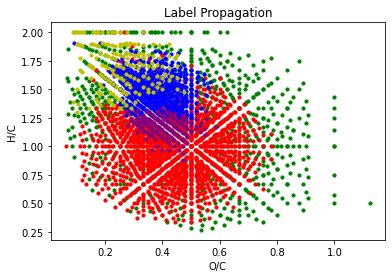

In [4]:
plt.scatter(df_lpa_group3.oc, df_lpa_group3.hc, c='g', s=10)
plt.scatter(df_lpa_group2.oc, df_lpa_group2.hc, c='r', s=10)
plt.scatter(df_lpa_group1.oc, df_lpa_group1.hc, c='b', s=10)
plt.scatter(df_lpa_group4.oc, df_lpa_group4.hc, c='y', s=10)
plt.scatter(df_lpa_group5.oc, df_lpa_group5.hc, c='purple', s=10)
plt.xlabel('O/C')
plt.ylabel('H/C')
plt.title('Label Propagation')
plt.show()

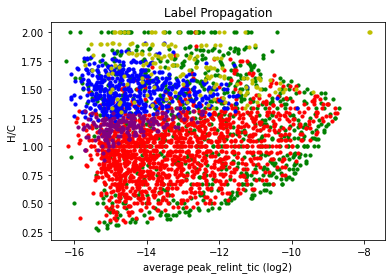

In [5]:
plt.scatter(df_lpa_group3.log_int, df_lpa_group3.hc, c='g', s=10)
plt.scatter(df_lpa_group2.log_int, df_lpa_group2.hc, c='r', s=10)
plt.scatter(df_lpa_group1.log_int, df_lpa_group1.hc, c='b', s=10)
plt.scatter(df_lpa_group4.log_int, df_lpa_group4.hc, c='y', s=10)
plt.scatter(df_lpa_group5.log_int, df_lpa_group5.hc, c='purple', s=10)
plt.xlabel('average peak_relint_tic (log2)')
plt.ylabel('H/C')
plt.title('Label Propagation')
plt.show()

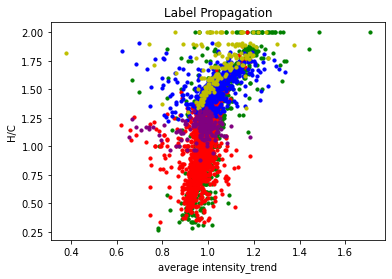

In [6]:
plt.scatter(df_lpa_group3.avg_int_trend, df_lpa_group3.hc, c='g', s=10)
plt.scatter(df_lpa_group2.avg_int_trend, df_lpa_group2.hc, c='r', s=10)
plt.scatter(df_lpa_group1.avg_int_trend, df_lpa_group1.hc, c='b', s=10)
plt.scatter(df_lpa_group4.avg_int_trend, df_lpa_group4.hc, c='y', s=10)
plt.scatter(df_lpa_group5.avg_int_trend, df_lpa_group5.hc, c='purple', s=10)
plt.xlabel('average intensity_trend')
plt.ylabel('H/C')
plt.title('Label Propagation')
plt.show()

# Modularity Optimization
## Top 5 groups, only CHO

In [7]:
df_mo_group1 = call_graph_com.run("""
    MATCH (m:Molecule)
    WHERE m.mo_directed = 1951
    AND m.formula_class = 'CHO'
    RETURN m.formula_string as fs, m.formula_class as fc, m.OC as oc, m.HC as hc
""").to_data_frame()

df_mo_group2 = call_graph_com.run("""
    MATCH (m:Molecule)
    WHERE m.mo_directed = 1554
    AND m.formula_class = 'CHO'
    RETURN m.formula_string as fs, m.formula_class as fc, m.OC as oc, m.HC as hc
""").to_data_frame()

df_mo_group3 = call_graph_com.run("""
    MATCH (m:Molecule)
    WHERE m.mo_directed = 3111
    AND m.formula_class = 'CHO'
    RETURN m.formula_string as fs, m.formula_class as fc, m.OC as oc, m.HC as hc
""").to_data_frame()

df_mo_group4 = call_graph_com.run("""
    MATCH (m:Molecule)
    WHERE m.mo_directed = 319
    AND m.formula_class = 'CHO'
    RETURN m.formula_string as fs, m.formula_class as fc, m.OC as oc, m.HC as hc
""").to_data_frame()

df_mo_group5 = call_graph_com.run("""
    MATCH (m:Molecule)
    WHERE m.mo_directed = 913
    AND m.formula_class = 'CHO'
    RETURN m.formula_string as fs, m.formula_class as fc, m.OC as oc, m.HC as hc
""").to_data_frame()

In [8]:
df_par = call_graph_par.run("""
    MATCH (m:Molecule)-[s:SAME_AS]-(:Molecule)
    WITH DISTINCT m.formula_string as fs, avg(s.intensity_trend) as avg_int_trend, avg(m.peak_relint_tic) as avg_int
    RETURN fs, avg_int, avg_int_trend
""").to_data_frame()

df_mo_group1 = pd.merge(df_mo_group1, df_par, left_on=['fs'], right_on=['fs'])
df_mo_group2 = pd.merge(df_mo_group2, df_par, left_on=['fs'], right_on=['fs'])
df_mo_group3 = pd.merge(df_mo_group3, df_par, left_on=['fs'], right_on=['fs'])
df_mo_group4 = pd.merge(df_mo_group4, df_par, left_on=['fs'], right_on=['fs'])
df_mo_group5 = pd.merge(df_mo_group5, df_par, left_on=['fs'], right_on=['fs'])

df_mo_group1['log_int'] = np.log2(df_mo_group1['avg_int'])
df_mo_group2['log_int'] = np.log2(df_mo_group2['avg_int'])
df_mo_group3['log_int'] = np.log2(df_mo_group3['avg_int'])
df_mo_group4['log_int'] = np.log2(df_mo_group4['avg_int'])
df_mo_group5['log_int'] = np.log2(df_mo_group5['avg_int'])

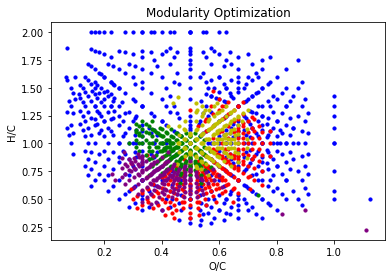

In [9]:
plt.scatter(df_mo_group1.oc, df_mo_group1.hc, c='b', s=10)
plt.scatter(df_mo_group2.oc, df_mo_group2.hc, c='r', s=10)
plt.scatter(df_mo_group3.oc, df_mo_group3.hc, c='g', s=10)
plt.scatter(df_mo_group4.oc, df_mo_group4.hc, c='y', s=10)
plt.scatter(df_mo_group5.oc, df_mo_group5.hc, c='purple', s=10)
plt.xlabel('O/C')
plt.ylabel('H/C')
plt.title('Modularity Optimization')
plt.show()

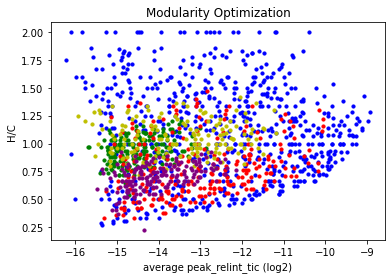

In [10]:
plt.scatter(df_mo_group1.log_int, df_mo_group1.hc, c='b', s=10)
plt.scatter(df_mo_group3.log_int, df_mo_group3.hc, c='g', s=10)
plt.scatter(df_mo_group2.log_int, df_mo_group2.hc, c='r', s=10)
plt.scatter(df_mo_group4.log_int, df_mo_group4.hc, c='y', s=10)
plt.scatter(df_mo_group5.log_int, df_mo_group5.hc, c='purple', s=10)
plt.xlabel('average peak_relint_tic (log2)')
plt.ylabel('H/C')
plt.title('Modularity Optimization')
plt.show()

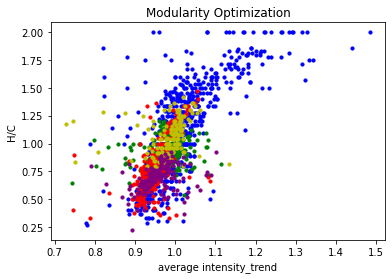

In [11]:
plt.scatter(df_mo_group1.avg_int_trend, df_mo_group1.hc, c='b', s=10)
plt.scatter(df_mo_group3.avg_int_trend, df_mo_group3.hc, c='g', s=10)
plt.scatter(df_mo_group2.avg_int_trend, df_mo_group2.hc, c='r', s=10)
plt.scatter(df_mo_group4.avg_int_trend, df_mo_group4.hc, c='y', s=10)
plt.scatter(df_mo_group5.avg_int_trend, df_mo_group5.hc, c='purple', s=10)
plt.xlabel('average intensity_trend')
plt.ylabel('H/C')
plt.title('Modularity Optimization')
plt.show()

# K1 Coloring
## Top 5 groups, only CHO

In [12]:
df_k1_group1 = call_graph_com.run("""
    MATCH (m:Molecule)
    WHERE m.k1_directed = 0
    AND m.formula_class = 'CHO'
    RETURN m.formula_string as fs, m.formula_class as fc, m.OC as oc, m.HC as hc
""").to_data_frame()

df_k1_group2 = call_graph_com.run("""
    MATCH (m:Molecule)
    WHERE m.k1_directed = 1
    AND m.formula_class = 'CHO'
    RETURN m.formula_string as fs, m.formula_class as fc, m.OC as oc, m.HC as hc
""").to_data_frame()

df_k1_group3 = call_graph_com.run("""
    MATCH (m:Molecule)
    WHERE m.k1_directed = 2
    AND m.formula_class = 'CHO'
    RETURN m.formula_string as fs, m.formula_class as fc, m.OC as oc, m.HC as hc
""").to_data_frame()

df_k1_group4 = call_graph_com.run("""
    MATCH (m:Molecule)
    WHERE m.k1_directed = 3
    AND m.formula_class = 'CHO'
    RETURN m.formula_string as fs, m.formula_class as fc, m.OC as oc, m.HC as hc
""").to_data_frame()

df_k1_group5 = call_graph_com.run("""
    MATCH (m:Molecule)
    WHERE m.k1_directed = 4
    AND m.formula_class = 'CHO'
    RETURN m.formula_string as fs, m.formula_class as fc, m.OC as oc, m.HC as hc
""").to_data_frame()

In [13]:
df_par = call_graph_par.run("""
    MATCH (m:Molecule)-[s:SAME_AS]-(:Molecule)
    WITH DISTINCT m.formula_string as fs, avg(s.intensity_trend) as avg_int_trend, avg(m.peak_relint_tic) as avg_int
    RETURN fs, avg_int, avg_int_trend
""").to_data_frame()

df_k1_group1 = pd.merge(df_k1_group1, df_par, left_on=['fs'], right_on=['fs'])
df_k1_group2 = pd.merge(df_k1_group2, df_par, left_on=['fs'], right_on=['fs'])
df_k1_group3 = pd.merge(df_k1_group3, df_par, left_on=['fs'], right_on=['fs'])
df_k1_group4 = pd.merge(df_k1_group4, df_par, left_on=['fs'], right_on=['fs'])
df_k1_group5 = pd.merge(df_k1_group5, df_par, left_on=['fs'], right_on=['fs'])

df_k1_group1['log_int'] = np.log2(df_k1_group1['avg_int'])
df_k1_group2['log_int'] = np.log2(df_k1_group2['avg_int'])
df_k1_group3['log_int'] = np.log2(df_k1_group3['avg_int'])
df_k1_group4['log_int'] = np.log2(df_k1_group4['avg_int'])
df_k1_group5['log_int'] = np.log2(df_k1_group5['avg_int'])

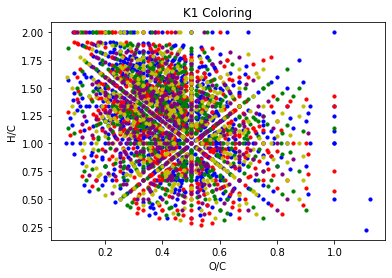

In [14]:
plt.scatter(df_k1_group1.oc, df_k1_group1.hc, c='b', s=10)
plt.scatter(df_k1_group2.oc, df_k1_group2.hc, c='r', s=10)
plt.scatter(df_k1_group3.oc, df_k1_group3.hc, c='g', s=10)
plt.scatter(df_k1_group4.oc, df_k1_group4.hc, c='y', s=10)
plt.scatter(df_k1_group5.oc, df_k1_group5.hc, c='purple', s=10)
plt.xlabel('O/C')
plt.ylabel('H/C')
plt.title('K1 Coloring')
plt.show()

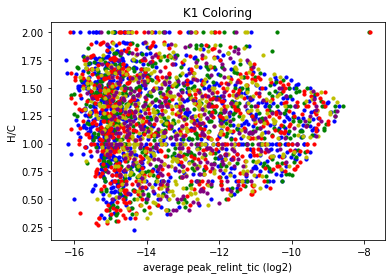

In [15]:
plt.scatter(df_k1_group1.log_int, df_k1_group1.hc, c='b', s=10)
plt.scatter(df_k1_group3.log_int, df_k1_group3.hc, c='g', s=10)
plt.scatter(df_k1_group2.log_int, df_k1_group2.hc, c='r', s=10)
plt.scatter(df_k1_group4.log_int, df_k1_group4.hc, c='y', s=10)
plt.scatter(df_k1_group5.log_int, df_k1_group5.hc, c='purple', s=10)
plt.xlabel('average peak_relint_tic (log2)')
plt.ylabel('H/C')
plt.title('K1 Coloring')
plt.show()

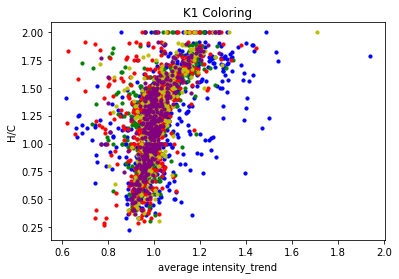

In [16]:
plt.scatter(df_k1_group1.avg_int_trend, df_k1_group1.hc, c='b', s=10)
plt.scatter(df_k1_group3.avg_int_trend, df_k1_group3.hc, c='g', s=10)
plt.scatter(df_k1_group2.avg_int_trend, df_k1_group2.hc, c='r', s=10)
plt.scatter(df_k1_group4.avg_int_trend, df_k1_group4.hc, c='y', s=10)
plt.scatter(df_k1_group5.avg_int_trend, df_k1_group5.hc, c='purple', s=10)
plt.xlabel('average intensity_trend')
plt.ylabel('H/C')
plt.title('K1 Coloring')
plt.show()

# Transformations

In [ ]:
call_graph_par.run("""
    MATCH (m:Molecule)-[h:HAS_TRANSFORMED_INTO]->(:Molecule)
    RETURN h.tra
""")

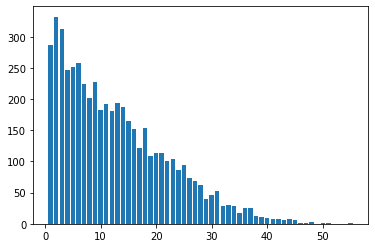

In [31]:
df = call_graph_com.run("""
    MATCH (m:Molecule)
    WHERE m.hti_incoming > 0
    RETURN toInteger(m.hti_incoming) as hti_number, count(m.hti_incoming) as hti_count
    ORDER BY hti_number 
""").to_data_frame()

plt.bar(df.hti_number, df.hti_count)
plt.show()

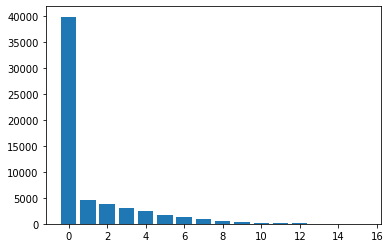

In [2]:
df = call_graph_par.run("""
    MATCH (m:Molecule)
    WHERE m.point_in_time < 12
    OPTIONAL MATCH (m)-[h:HAS_TRANSFORMED_INTO]->(:Molecule)
    //RETURN m.formula_string, m.point_in_time, count(h)
    WITH m.formula_string as fs, m.point_in_time as pit, count(h) as cnt_hti
    RETURN cnt_hti, count(cnt_hti) as sum_cnt
""").to_data_frame()

#df
plt.bar(df.cnt_hti, df.sum_cnt)
plt.show()

    cnt_hti  sum_cnt
0         6     1312
1         1     4486
2         3     3004
3         8      604
4         5     1770
5         2     3783
6         7      887
7         4     2424
8         9      351
9        12       64
10       10      179
11       11      105
12       14       10
13       13       22
14       15        1


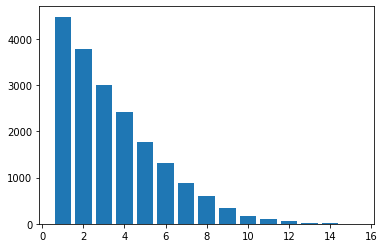

In [16]:
df = call_graph_par.run("""
    MATCH (m)-[h:HAS_TRANSFORMED_INTO]->(:Molecule)
    WHERE m.point_in_time < 12
    //RETURN m.formula_string, m.point_in_time, count(h)
    WITH m.formula_string as fs, m.point_in_time as pit, count(h) as cnt_hti
    RETURN cnt_hti, count(cnt_hti) as sum_cnt
""").to_data_frame()

print(df)
#df['cnt_hti'] = np.log2(df['cnt_hti'])
#df['sum_cnt'] = np.log2(df['sum_cnt'])

plt.bar(df.cnt_hti, df.sum_cnt)
plt.show()

     log_hti   log_cnt  cnt_hti  sum_cnt
0   0.000000  8.408717        1     4486
1   0.693147  8.238273        2     3783
2   1.098612  8.007700        3     3004
3   1.386294  7.793174        4     2424
4   1.609438  7.478735        5     1770
5   1.791759  7.179308        6     1312
6   1.945910  6.787845        7      887
7   2.079442  6.403574        8      604
8   2.197225  5.860786        9      351
9   2.302585  5.187386       10      179
10  2.397895  4.653960       11      105
11  2.484907  4.158883       12       64
12  2.564949  3.091042       13       22
13  2.639057  2.302585       14       10
14  2.708050  0.000000       15        1


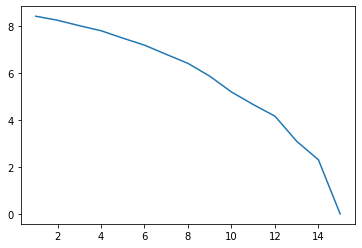

In [22]:
df = call_graph_par.run("""
    MATCH (m)-[h:HAS_TRANSFORMED_INTO]->(:Molecule)
    WHERE m.point_in_time < 12
    //RETURN m.formula_string, m.point_in_time, count(h)
    WITH m.formula_string as fs, m.point_in_time as pit, count(h) as cnt_hti
    WITH cnt_hti, count(cnt_hti) as sum_cnt
    RETURN log(cnt_hti) as log_hti, log(sum_cnt) as log_cnt, cnt_hti, sum_cnt
    ORDER BY log_hti
""").to_data_frame()

print(df)
#df['cnt_hti'] = np.log2(df['cnt_hti'])
#df['sum_cnt'] = np.log2(df['sum_cnt'])

plt.plot(df.cnt_hti, df.log_cnt)
plt.show()

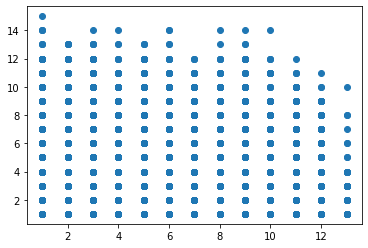

In [35]:
df = call_graph_par.run("""
    MATCH (m:Molecule)-[s:HAS_TRANSFORMED_INTO]->(:Molecule)
    WITH m, count(s) as cnt_out
    RETURN m.formula_string as fs, m.point_in_time as pit, cnt_out, m.measurement_rank as mr
    ORDER BY cnt_out ASC
""").to_data_frame()

df

plt.scatter(df.mr, df.cnt_out)
plt.show()